# MLP

In [137]:
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
import torch

--2025-05-06 05:32:08--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt.3’

names.txt.3         100%[===================>] 222.80K  --.-KB/s    in 0.007s  

2025-05-06 05:32:08 (31.6 MB/s) - ‘names.txt.3’ saved [228145/228145]



In [138]:
words = open("names.txt",'r').read().splitlines()

In [139]:
len(words)

32033

In [140]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [141]:
# ene shit ni bol yurn 3n char shaagaad, 4duhiig ni predict shaana.
# tiim bolohoor, X ni 3char, Y ni 4th character gesen ug.

# build the dataset

def build_dataset(block_size=3,n=len(words)):

    # block_size = 3  # content length : how many characters do we take to predict the next one?
    X,Y = [], []
    for w in words[:n]:
        print(w)
        context = [0]*block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)  # 3 characters to be used to predict our shit.
            Y.append(ix)   # 4th char that would be predicted.
            print('.'.join(itos[i] for i in context),'--->',itos[ix])
            context = context[1:] + [ix]  # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X,Y

In [142]:
X,Y = build_dataset(n=1)
print("X : ",X)
print("Y : ",Y)

emma
..... ---> e
....e ---> m
..e.m ---> m
e.m.m ---> a
m.m.a ---> .
X :  tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1]])
Y :  tensor([ 5, 13, 13,  1,  0])


In [143]:
X.shape, Y.shape , Y.dtype

(torch.Size([5, 3]), torch.Size([5]), torch.int64)

In [144]:
# look up table ---> as temuujin knows,word embedding matrix

C = torch.randn((27,2))   # let's just embed each character is size of 2 vector.

In [145]:
# embedding whole shit

X,Y = build_dataset()


Streaming output truncated to the last 5000 lines.
michail
..... ---> m
....m ---> i
..m.i ---> c
m.i.c ---> h
i.c.h ---> a
c.h.a ---> i
h.a.i ---> l
a.i.l ---> .
michale
..... ---> m
....m ---> i
..m.i ---> c
m.i.c ---> h
i.c.h ---> a
c.h.a ---> l
h.a.l ---> e
a.l.e ---> .
mihail
..... ---> m
....m ---> i
..m.i ---> h
m.i.h ---> a
i.h.a ---> i
h.a.i ---> l
a.i.l ---> .
miken
..... ---> m
....m ---> i
..m.i ---> k
m.i.k ---> e
i.k.e ---> n
k.e.n ---> .
mikyng
..... ---> m
....m ---> i
..m.i ---> k
m.i.k ---> y
i.k.y ---> n
k.y.n ---> g
y.n.g ---> .
mila
..... ---> m
....m ---> i
..m.i ---> l
m.i.l ---> a
i.l.a ---> .
moaaz
..... ---> m
....m ---> o
..m.o ---> a
m.o.a ---> a
o.a.a ---> z
a.a.z ---> .
moaz
..... ---> m
....m ---> o
..m.o ---> a
m.o.a ---> z
o.a.z ---> .
moeez
..... ---> m
....m ---> o
..m.o ---> e
m.o.e ---> e
o.e.e ---> z
e.e.z ---> .
mohamadou
..... ---> m
....m ---> o
..m.o ---> h
m.o.h ---> a
o.h.a ---> m
h.a.m ---> a
a.m.a ---> d
m.a.d ---> o
a.d.o ---> u
d.o.u --->

In [146]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [147]:
emb[:1]

tensor([[[ 0.8036, -1.1152],
         [ 0.8036, -1.1152],
         [ 0.8036, -1.1152]]])

In [148]:
w1 = torch.randn((6,100))  # input shape ni 6 shuude. cuz each row now has 6 elements. 3 tokens that used to be predict next and each token is embedded by 2size of vector . that is making each row --> size of 6>
# 100 ni bol zugeer l bidnii shiideh any output number.
b1 = torch.randn(100)

In [149]:
# ene bol nuguu 3n token-ii embedding-iig neg vector bolgood shaaachij baigaa.
# ugaasa l bidnii zorilgo bol 3character-iin combo ni daraagiin character-iig predict shaah shuude.

torch.concat(torch.unbind(emb,1),1).shape

torch.Size([228146, 6])

In [150]:
h = torch.tanh(emb.view(-1,6) @ w1 + b1)  # now hidden layer is done with activation.
h.shape

torch.Size([228146, 100])

In [151]:
w2 = torch.randn((100,27))  # this shit is our last layer. and ofc we will be having 27probs.
b2 = torch.randn(27)

In [152]:
# now the softmax for prob blah2
logits = h @ w2 + b2
logits.shape

torch.Size([228146, 27])

In [153]:
counts = logits.exp()
prob = counts / counts.sum(1,keepdim=True)
prob.shape

torch.Size([228146, 27])

In [154]:
prob[torch.arange(32),Y[:32]]  # let's how this shit's prob for next token --> we haven't trained anything yet.

tensor([1.9582e-08, 2.2804e-06, 3.0069e-07, 8.2987e-07, 1.7430e-08, 3.3373e-06,
        2.4912e-15, 2.4244e-06, 1.1947e-06, 8.0940e-01, 6.7339e-01, 1.7267e-10,
        2.7395e-02, 7.4118e-04, 4.6507e-04, 3.2441e-11, 6.7232e-07, 2.8589e-03,
        1.2579e-01, 3.0219e-09, 6.6577e-06, 1.5217e-12, 4.3280e-08, 6.6438e-06,
        1.4033e-06, 1.0166e-02, 2.0118e-10, 3.8967e-12, 6.0783e-11, 5.5059e-01,
        2.1781e-06, 2.3563e-09])

In [155]:
loss = -prob[torch.arange(32),Y[:32]].log().mean()
loss

tensor(14.0500)

let' little bit clean up the things.

In [207]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,2),generator=g)
W1 = torch.randn((6,100),generator=g)
b1 = torch.randn(100,generator=g)
W2 = torch.randn((100,27),generator = g)
b2 = torch.randn(27,generator=g)
parameters = [C,W1,b1,W2,b2]

In [208]:
sum(p.nelement() for p in parameters)  # number of parameters in total

3481

In [209]:
# forward pass
emb = C[X]
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
logits = h @ W2 + b2
counts = logits.exp()
prob = counts / counts.sum(1,keepdim=True)
loss = -prob[torch.arange(32),Y[:32]].log().mean()
loss

tensor(17.7697)

In [210]:
import torch.nn.functional as F

loss = F.cross_entropy(logits[:32],Y[:32])   # we can just do like that, instead of manually doing all of those shits.
loss

tensor(17.7697)

In [211]:
for p in parameters :
    p.requires_grad = True

In [212]:
# we're about to find the most optimal learning rate.
learning_rate_exp = torch.linspace(-3,0,1000)
lrs = 10 ** learning_rate_exp
#lrs

In [204]:
lossi = []
lri = []

for i in range(1000):
    #minibatch construct
    ix = torch.randint(0,X.shape[0],(32,))  # 32 batch_size

    #forward pass
    emb = C[X[ix]]  # only grabbing randomly generated 32 batches at a single epoch
    h = torch.tanh(emb.view(-1,6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Y[ix])
    #print(loss)

    # backward pass

    for p in parameters :
        p.grad = None

    loss.backward()

    #update
    lr = lrs[i]
    for p in parameters :
        p.data += -lr *p.grad

    # track stats
    lri.append(lr)
    lossi.append(loss.item())

print(loss.item())


9.0145263671875


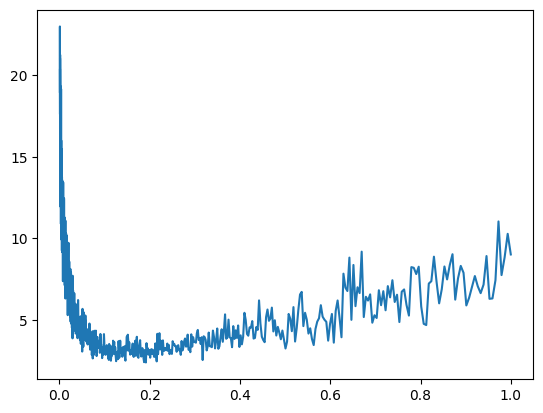

In [206]:
import matplotlib.pyplot as plt
plt.plot(lri,lossi)
# in here we see, 0.1 is a good learning rate.

In [218]:
for i in range(1000):
    #minibatch construct
    ix = torch.randint(0,X.shape[0],(32,))  # 32 batch_size

    #forward pass
    emb = C[X[ix]]  # only grabbing randomly generated 32 batches at a single epoch
    h = torch.tanh(emb.view(-1,6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Y[ix])
    #print(loss)

    # backward pass

    for p in parameters :
        p.grad = None

    loss.backward()

    #update
    lr = 0.1
    for p in parameters :
        p.data += -lr *p.grad

print(loss.item())


2.487095832824707


In [219]:
emb = C[X]
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Y)
loss

tensor(2.5695, grad_fn=<NllLossBackward0>)

### train--80% ,dev(validation)--10% , test--10% split


In [220]:
def build_dataset(words):
    block_size = 3
    X,Y = [], []
    for w in words :
        context = [0]*block_size
        for ch in w + ".":
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr,Ytr = build_dataset(words[:n1])
Xdev,Ydev = build_dataset(words[n1:n2])
Xte,Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


## Train using training data set

And also fucking increasing size of embedding vectors + parameter of the neural network

In [260]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10),generator=g)
W1 = torch.randn((30,200),generator=g)  # and we increased our parameters,too.
b1 = torch.randn(200,generator=g)
W2 = torch.randn((200,27),generator = g)
b2 = torch.randn(27,generator=g)
parameters = [C,W1,b1,W2,b2]

# forward pass
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ytr)
loss

for p in parameters :
    p.requires_grad = True


In [261]:
sum(p.nelement() for p in parameters)

11897

In [262]:
lri = []
lossi = []
stepi = []


In [263]:
for i in range(200000):
    #minibatch construct
    ix = torch.randint(0,Xtr.shape[0],(32,))  # 32 batch_size

    #forward pass
    emb = C[Xtr[ix]]  # only grabbing randomly generated 32 batches at a single epoch
    h = torch.tanh(emb.view(-1,30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Ytr[ix])
    #print(loss)

    # backward pass

    for p in parameters :
        p.grad = None

    loss.backward()

    #update
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters :
        p.data += -lr *p.grad

    # track stats
    lossi.append(loss.log10().item())
    stepi.append(i)

print(loss.item())


2.1426525115966797


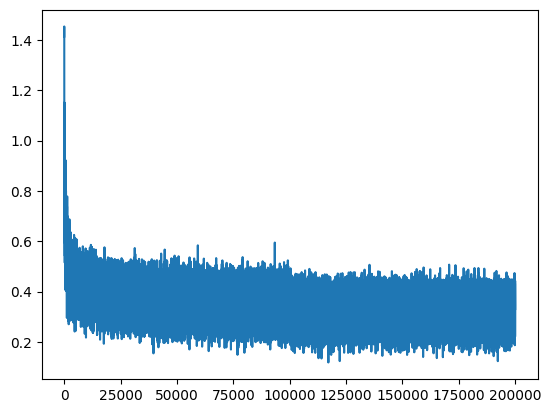

In [264]:
plt.plot(stepi,lossi)

## Eval using dev/validation dataset

In [265]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ydev)
loss

tensor(2.1635, grad_fn=<NllLossBackward0>)

### Visualising embedding vector

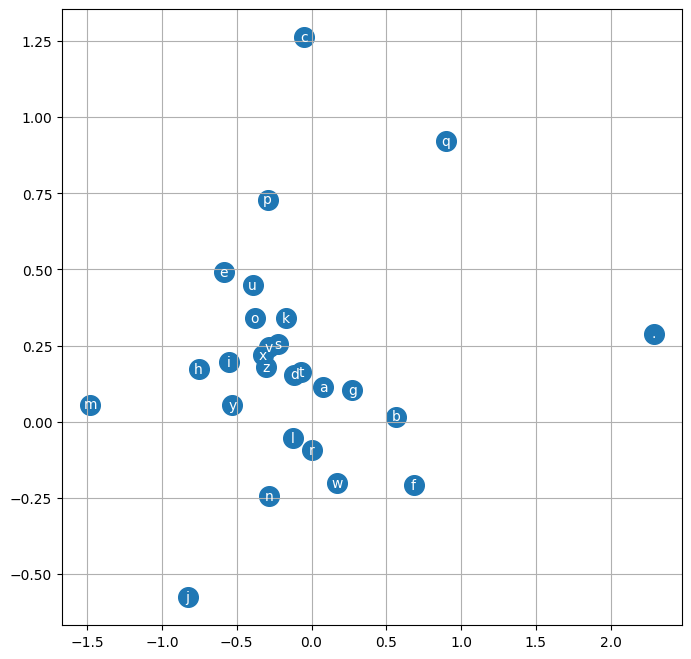

In [259]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data,C[:,1].data,s=200)   # x and y coordinate for each of the embedding vectors.
for i in range(C.shape[0]):
    plt.text(C[i,0].item(),C[i,1].item(),itos[i],ha='center',va='center',color='white')

plt.grid('minor')

### Now it is time for generating  names

In [270]:
#sample from the model
block_size = 3
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    out = []
    context = [0]*block_size
    while True :
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1,-1)@W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits,dim=1)
        ix = torch.multinomial(probs,num_samples=1,generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0 :
            break

    print(''.join(itos[i] for i in out))


mora.
kayanniee.
madhryal.
rethruthadraeg.
azeredgelin.
shi.
jenleigh.
esmanara.
myki.
hokalin.
shaberging.
jestin.
joseller.
novalan.
brence.
ryyah.
faeha.
kaysh.
skylanihia.
salynn.
